In [1]:
!sudo ls /sirfvmshared

test.GATE.hroot  testGATEoutput.root  testSino_f1g1d0b0.hs  testSino_f1g1d0b0.s


In [2]:
!sudo cp /sirfvmshared/testSino_f1g1d0b0.s .
!sudo chown sirfuser:sirfuser testSino_f1g1d0b0.s

In [3]:
!sudo cp /sirfvmshared/testSino_f1g1d0b0.hs .
!sudo chown sirfuser:sirfuser testSino_f1g1d0b0.hs

In [4]:
!ls -l

total 1026516
-rwxrwxrwx 1 sirfuser sirfuser       1902 Aug 21 13:40 test.GATE.hroot
-rwxrwxrwx 1 sirfuser sirfuser    4716815 Aug 21 13:40 testGATEoutput.root
-rw-rw-r-- 1 sirfuser sirfuser     133323 Aug 29 14:21 TestLoading.ipynb
-rwxr-x--- 1 sirfuser sirfuser       2062 Aug 29 14:22 testSino_f1g1d0b0.hs
-rwxr-x--- 1 sirfuser sirfuser 1046282880 Aug 29 14:22 testSino_f1g1d0b0.s


In [5]:
import sirf.STIR as PET

In [6]:
scatter = PET.AcquisitionData("testSino_f1g1d0b0.hs")
scatter_array = scatter.as_array()
print( scatter_array.shape )
print( scatter.dimensions() )
#help(scatter)


INFO: Interfile warning: I did not recognise the scanner from 'originating_system' (). Hopefully there is enough information present. I will check this now.


(1, 2001, 380, 344)
(np.int32(1), np.int32(2001), np.int32(380), np.int32(344))


1436 1847


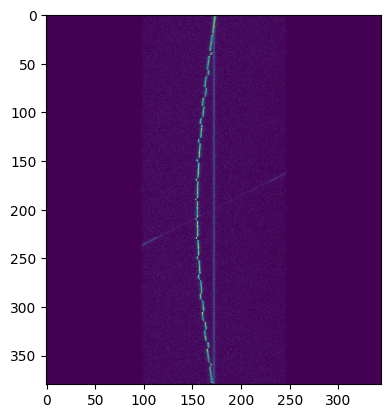

In [7]:
import numpy as np
import matplotlib.pyplot as plt

filledSinoIndices = []
for i, sino in enumerate( scatter_array[0] ):
    if np.sum( sino ) > 0:
        filledSinoIndices.append(i)
print( min( filledSinoIndices ), max( filledSinoIndices ) )

# Mostly empty datastructure - sum over all sinos

combinedSino = np.sum( scatter_array, axis=1 )[0]
plt.imshow( combinedSino )
plt.show()